# 2.1. Problem Statement: Machine Learning 7

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:
import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)`

# Solution

In [3]:
import pandas as pd
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [16]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [32]:
nba[nba['ft.'].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
27,Chris Babb,SG,23,BOS,14,0,132,8,30,0.267,...,13,17,3,6,0,3,13,22,2013-2014,2013
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,...,3,3,2,1,0,1,1,0,2013-2014,2013
102,Robert Covington,SF,23,HOU,7,0,34,6,14,0.429,...,3,5,0,2,0,1,3,16,2013-2014,2013
109,Seth Curry,PG,23,TOT,2,0,13,1,3,0.333,...,1,1,0,2,0,0,0,3,2013-2014,2013
112,Troy Daniels,SG,22,HOU,5,1,75,15,31,0.484,...,4,4,5,0,0,3,6,42,2013-2014,2013
134,Shane Edwards,SF,26,CLE,2,0,12,1,3,0.333,...,1,2,0,0,0,1,1,2,2013-2014,2013
137,Melvin Ely,C,35,NOP,2,0,27,3,6,0.500,...,1,1,0,0,1,0,5,6,2013-2014,2013
166,Ryan Gomes,SF,31,OKC,5,0,34,3,8,0.375,...,4,4,1,0,0,1,5,6,2013-2014,2013
190,Elias Harris,SF,24,LAL,2,0,11,0,1,0.000,...,0,1,1,1,0,0,0,0,2013-2014,2013
219,Royal Ivey,SG,32,OKC,2,0,5,0,2,0.000,...,1,1,0,0,0,0,1,0,2013-2014,2013


In [33]:
nba[nba['fg.'].isnull()]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,...,3,3,2,1,0,1,1,0,2013-2014,2013
397,Chris Smith,PG,26,NYK,2,0,2,0,0,NaN,...,0,0,0,0,0,0,0,0,2013-2014,2013


In [40]:
# Filling the NaN values with mean value of respective columns
import numpy as np
nba['fg.']=nba['fg.'].fillna(np.mean(nba['fg.']))
nba['x3p.']=nba['x3p.'].fillna(np.mean(nba['x3p.']))
nba['x2p.']=nba['x2p.'].fillna(np.mean(nba['x2p.']))
nba['efg.']=nba['efg.'].fillna(np.mean(nba['efg.']))
nba['ft.']=nba['ft.'].fillna(np.mean(nba['ft.']))

In [41]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.             False
x3p             False
x3pa            False
x3p.            False
x2p             False
x2pa            False
x2p.            False
efg.            False
ft              False
fta             False
ft.             False
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

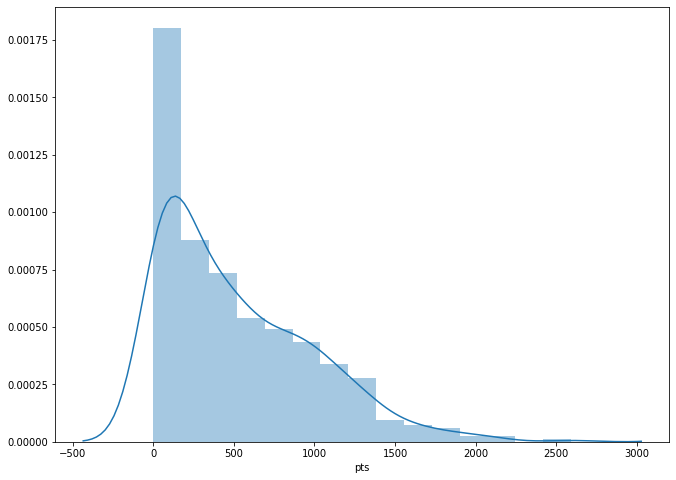

In [50]:
#Visualization of target value - price
import seaborn as sns
a4_dims = (11, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(nba['pts'])

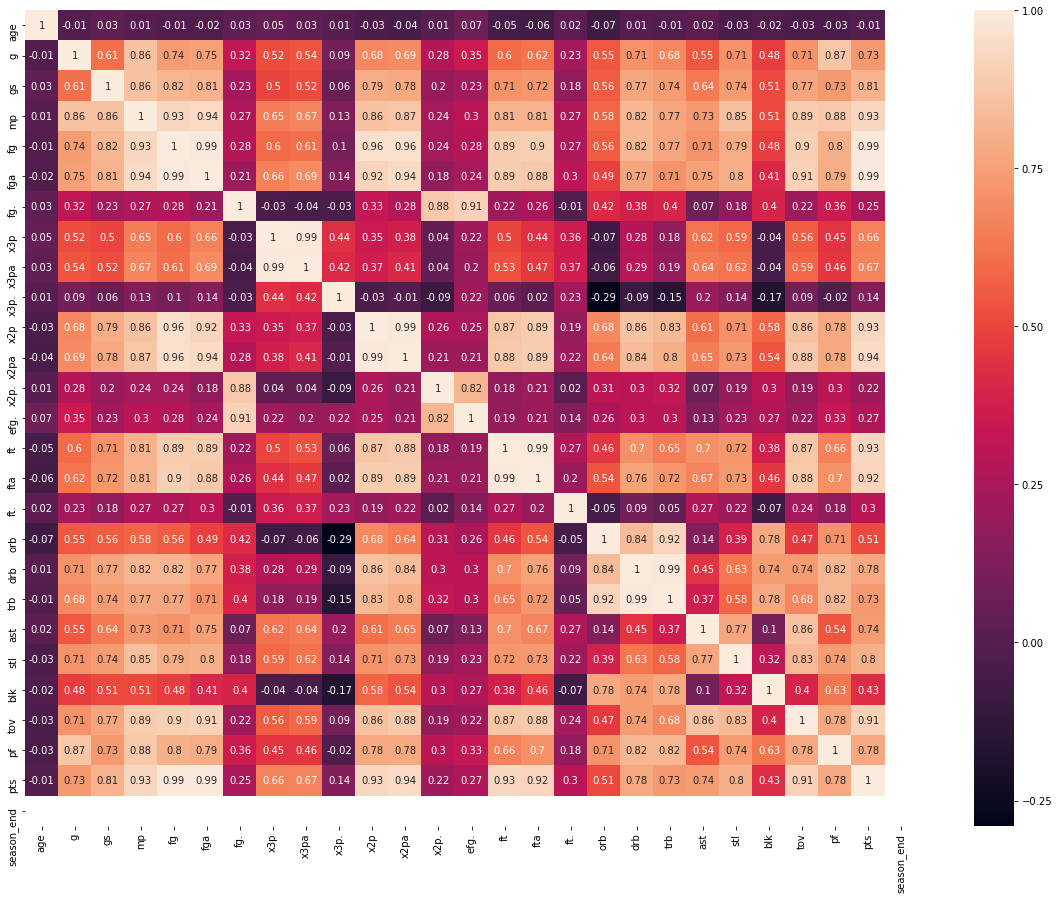

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=nba.corr().round(2)
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr_matrix,annot=True)

In [48]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [53]:
# Dropping object columns which have least correlation - player, pos, bref_team_id and season
nba.drop(['player','pos','bref_team_id','season','season_end'],axis=1,inplace=True)

In [54]:
# Splitting the data to training and testing data
from sklearn.model_selection import train_test_split
y = nba['pts']
X = nba.drop('pts',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print("Shape of Training set:",X_train.shape)
print("Shape of labelled data for Training:",y_train.shape)
print("Shape of Testing set:",X_test.shape)
print("Shape of labelled data for Testing:",y_test.shape)

Shape of Training set: (384, 25)
Shape of labelled data for Training: (384,)
Shape of Testing set: (97, 25)
Shape of labelled data for Testing: (97,)


In [72]:
from sklearn.neighbors import KNeighborsRegressor
for n_neighbors in [1,3,5,7,9,11]:
    print("Number of neighbours:",n_neighbors)
    print("--------------------------------------------------------")
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    print("Respective R2 score is:",reg.score(X_test,y_test))
    print()

Number of neighbours: 1
--------------------------------------------------------
Respective R2 score is: 0.9727002681699988

Number of neighbours: 3
--------------------------------------------------------
Respective R2 score is: 0.9789575054760585

Number of neighbours: 5
--------------------------------------------------------
Respective R2 score is: 0.9823904946716215

Number of neighbours: 7
--------------------------------------------------------
Respective R2 score is: 0.9850390221112567

Number of neighbours: 9
--------------------------------------------------------
Respective R2 score is: 0.9811522767788301

Number of neighbours: 11
--------------------------------------------------------
Respective R2 score is: 0.9808049423205658



We can observe that the best result is obtained when number of neighbors is 7. So choosing n_neighbors as 7 and training and fitting the model we get as follows

In [70]:
from sklearn import metrics
reg_main = KNeighborsRegressor(n_neighbors=7)
reg_main.fit(X_train, y_train)

y_train_pred = reg_main.predict(X_train)
print("Original output for training set:")
print(y_train[0:5])
print("Predicted output for Training set:")
print(y_train_pred[:5])
print()

print("Testing the performance of the model for Training data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_train,y_train_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_train,y_train_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print()
y_test_pred = reg_main.predict(X_test) # Model prediction for test set
print("Original output for testing set:")
print(y_test[0:5])
print("Predicted output for Testing set:")
print(y_test_pred[:5])
print()
print()

# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Testing data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Original output for training set:
195    1053
24      930
76       43
82      101
398      38
Name: pts, dtype: int64
Predicted output for Training set:
[1081.28571429  894.42857143   36.85714286   81.85714286   25.        ]

Testing the performance of the model for Training data:
Mean Absolute Error: 41.35081845238095
Mean Squared Error: 4572.369100765307
Root Mean Squared Error: 67.61929532881356

Original output for testing set:
157    248
202    814
11      38
66      64
356      4
Name: pts, dtype: int64
Predicted output for Testing set:
[280.         834.85714286  38.42857143  78.57142857   4.57142857]


Testing the performance of the model for Testing data:
Mean Absolute Error: 37.20029455081002
Mean Squared Error: 2813.65306122449
Root Mean Squared Error: 53.04387864046605
